Euler's Method:

We want to build an ODE solver that allows us to specify an IVP, and then outputs a table and graph of the DE.

 - $y_{n+1} = y_n + h*y'(x_n, y_n)$

Test Example:

 - $ y'(x) = y-x^2+1$

 - $y(0) = 0.5$

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.50,0.000000,1.500000,0.575000
1,1.0,0.55,0.575000,1.272500,0.638625
2,2.0,0.60,0.638625,1.278625,0.702556
3,3.0,0.65,0.702556,1.280056,0.766559
4,4.0,0.70,0.766559,1.276559,0.830387
...,...,...,...,...,...
95,95.0,5.25,-145.123314,-171.685814,-153.707605
96,96.0,5.30,-153.707605,-180.797605,-162.747485
97,97.0,5.35,-162.747485,-190.369985,-172.265985
98,98.0,5.40,-172.265985,-200.425985,-182.287284


Text(0.5, 1.0, 'ODE Plot, Granularity = 0.05')

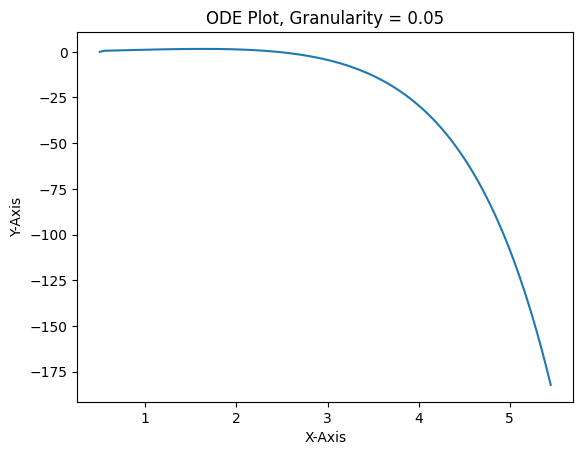

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#initial values
x0 = 0
y0 = 0.5
n = 100 #granularity
lastX = 5 #ending x value

# get y prime evaluated at x and y - THIS IS WHERE YOU PUT THE DE
def YP(x,y):
    return float(y-x**2+1)

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y)

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1']
ode = pd.DataFrame(columns=cols)
ode.loc[0] = [0, y0, x0, YP(x0,y0), new_y(x0,y0,h)]

# get n for intended last y value

def get_h(granularity, endval, startval):
    return (-endval+startval)/granularity

#define dx
h = get_h(n,x0,lastX)

#fill out the table
for i in range(1,n):
    ode.loc[i,'n'] = i
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + h
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1']
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n'])
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], h)

#display the table
display(ode)

#plot the figure
plt.figure
plt.plot(ode['x_n'],ode['y_n'])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'ODE Plot, Granularity = {h}')

Monte-Carlo Simulation:

Algorithm:
 - Sample randomly according to a uniform distribution in $[a,b]$.
 
 - Generate $dx$ list.

 - Use Euler's method, but don't use $n*h$, use $dx_i$ from the $dx$ list.

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.500000,0.000000,1.500000,0.512914
1,1.0,0.515089,0.512914,1.247598,0.531739
2,2.0,0.537670,0.531739,1.242650,0.559799
3,3.0,0.542842,0.559799,1.265122,0.566343
4,4.0,0.598785,0.566343,1.207800,0.633910
...,...,...,...,...,...
94,94.0,5.080249,-120.848868,-145.657803,-129.545206
95,95.0,5.139916,-129.545206,-154.963940,-138.791344
96,96.0,5.164537,-138.791344,-164.463785,-142.840607
97,97.0,5.314865,-142.840607,-170.088399,-168.409722


Text(0.5, 1.0, 'ODE Plot, Granularity = 100 Samples')

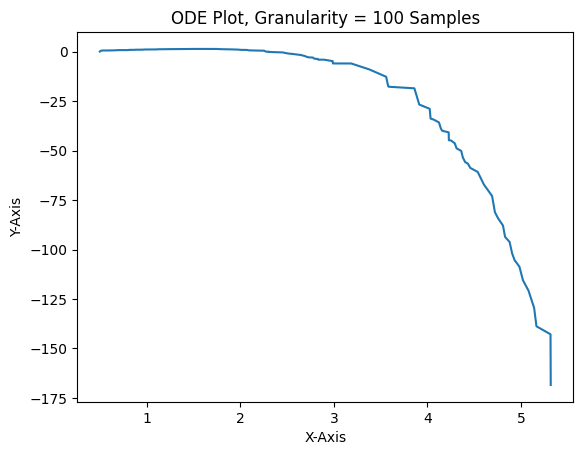

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

#initial values
x0 = 0
y0 = 0.5
n = 100 #granularity
lastX = 5 #ending x value

# get y prime evaluated at x and y - THIS IS WHERE YOU PUT THE DE
def YP(x,y):
    return float(y-x**2+1) 

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y)

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1']
ode = pd.DataFrame(columns=cols)

# get n for intended last y value

def get_h(granularity, endval, startval):
    #get our random sample list, in order.
    xsample = []
    for i in range(granularity):
        xsample += [rd.uniform(startval,endval)]
    
    xsample.sort()
    #get the dx list
    
    dx = []
    for i in range(len(xsample)-1):
        dx += [xsample[i+1]-xsample[i]]

    return dx

#define dx
dx = get_h(n,lastX,x0)
ode.loc[0] = [0, y0, x0, YP(x0,y0), new_y(x0,y0,dx[0])]

#fill out the table
for i in range(1,len(dx)):
    ode.loc[i,'n'] = i
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + dx[i]
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1']
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n'])
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], dx[i])

#display the table
display(ode)

#plot the figure
plt.figure
plt.plot(ode['x_n'],ode['y_n'])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'ODE Plot, Granularity = {n} Samples')